<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Additional_Session_Sheet_Regression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from sklearn import datasets

data = datasets.load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
+112->60

In [106]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
### Seperate features and Labels
X = data['data']
y = data['target']

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
### scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # learn sd and mean from training set and transform train set
X_test_scaled = scaler.transform(X_test) # transform test set

In [110]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
print("Train r2_score:",lr.score(X_train_scaled,y_train))
print("Test r2_score:",lr.score(X_test_scaled,y_test))

Train r2_score: 0.4993944835835079
Test r2_score: 0.4746690345973129


In [111]:
X_train_scaled.shape

(398, 10)

In [115]:
# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [116]:
X_train_poly.shape

(398, 3003)

In [117]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly,y_train)

print("Train r2_score:",poly_lr.score(X_train_poly,y_train))
print("Test r2_score:",poly_lr.score(X_test_poly,y_test))

Train r2_score: 1.0
Test r2_score: -1.1907197331820556


In [118]:
for degree in range(1,5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly,y_train)

    print("*"*50)
    print("Degree: ", degree)
    print("Train r2_score:",poly_lr.score(X_train_poly,y_train))
    print("Test r2_score:",poly_lr.score(X_test_poly,y_test))

**************************************************
Degree:  1
Train r2_score: 0.4993944835835078
Test r2_score: 0.4746690345973129
**************************************************
Degree:  2
Train r2_score: 0.5847149658001287
Test r2_score: 0.5712813421613747
**************************************************
Degree:  3
Train r2_score: 0.8206580428124358
Test r2_score: -0.9665704109906996
**************************************************
Degree:  4
Train r2_score: 1.0
Test r2_score: -4.322971520598675


In [119]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso



poly_lr = Ridge(alpha=0.1)
poly_lr.fit(X_train_poly,y_train)

print("*"*50)
print("Degree: ", degree)
print("Train r2_score:",poly_lr.score(X_train_poly,y_train))
print("Test r2_score:",poly_lr.score(X_test_poly,y_test))

**************************************************
Degree:  4
Train r2_score: 0.9988324705394817
Test r2_score: -2.805368252921979


### Fit Models:

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

alpha = 0.2

lr = LinearRegression()
r2_lr = Ridge(alpha)
r1_lr = Lasso(alpha)

all_models= (lr, r2_lr,r1_lr)

for degree in range(1,5):
    for model in (all_models):
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train_scaled)
        X_test_poly = poly.transform(X_test_scaled)
        model.fit(X_train_poly,y_train)

        print("*"*50)
        print("Model:", model)
        print("Degree: ", degree)
        print("Train r2_score:",model.score(X_train_poly,y_train))
        print("Test r2_score:",model.score(X_test_poly,y_test))

**************************************************
Model: LinearRegression()
Degree:  1
Train r2_score: 0.4993944835835078
Test r2_score: 0.4746690345973129
**************************************************
Model: Ridge(alpha=0.2)
Degree:  1
Train r2_score: 0.4993848464304065
Test r2_score: 0.4748690612766746
**************************************************
Model: Lasso(alpha=0.2)
Degree:  1
Train r2_score: 0.4980896877513983
Test r2_score: 0.477003675826265
**************************************************
Model: LinearRegression()
Degree:  2
Train r2_score: 0.5847149658001287
Test r2_score: 0.5712813421613747
**************************************************
Model: Ridge(alpha=0.2)
Degree:  2
Train r2_score: 0.5812379003324004
Test r2_score: 0.5731989412049583
**************************************************
Model: Lasso(alpha=0.2)
Degree:  2
Train r2_score: 0.5748245150521191
Test r2_score: 0.5819186809262871
**************************************************
Model: LinearReg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.544e+04, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


**************************************************
Model: LinearRegression()
Degree:  4
Train r2_score: 1.0
Test r2_score: -4.322971520598675
**************************************************
Model: Ridge(alpha=0.2)
Degree:  4
Train r2_score: 0.996856590701699
Test r2_score: -2.095900124041404
**************************************************
Model: Lasso(alpha=0.2)
Degree:  4
Train r2_score: 0.8966077773340358
Test r2_score: 0.540954637434224


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

train_scores = []
test_scores = []

degree = 3
alpha = 0.3

lr=LinearRegression()
ridge=Ridge(alpha)
lasso = Lasso(alpha)

models=(lr,ridge,lasso)
for model in models:
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.799e+03, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


In [123]:
print(list(zip(models,train_scores,test_scores)))

[(LinearRegression(), 0.7871903126933942, -1.019883111549019), (Ridge(alpha=0.3), 0.7521282111726949, 0.5848962346966506), (Lasso(alpha=0.3), 0.6693210391368867, 0.6251967828650822)]


Hyperparameter tuningL

In [128]:
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores = []
test_scores = []
degree = 3

for alpha in alpha_list:
    model = Lasso(alpha)
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), model)
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)


    train_scores.append(train_score)
    test_scores.append(test_score)

    print("*"*50)
    print("alpha:", alpha)
    print("Train r2_score:",polyreg_scaled.score(X_train,y_train))
    print("Test r2_score:",polyreg_scaled.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+05, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


**************************************************
alpha: 0.0001
Train r2_score: 0.7553917527123641
Test r2_score: 0.5699551994759929


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.835e+05, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


**************************************************
alpha: 0.001
Train r2_score: 0.7552252900238544
Test r2_score: 0.5702324459621245


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+05, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


**************************************************
alpha: 0.01
Train r2_score: 0.7524281384030708
Test r2_score: 0.5713665210997763


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.615e+04, tolerance: 2.373e+02
  model = cd_fast.enet_coordinate_descent(


**************************************************
alpha: 0.1
Train r2_score: 0.713827439667885
Test r2_score: 0.5868074168052643
**************************************************
alpha: 1
Train r2_score: 0.6105369934047944
Test r2_score: 0.6151127018259179
**************************************************
alpha: 10
Train r2_score: 0.45066724780828893
Test r2_score: 0.46954593758717544


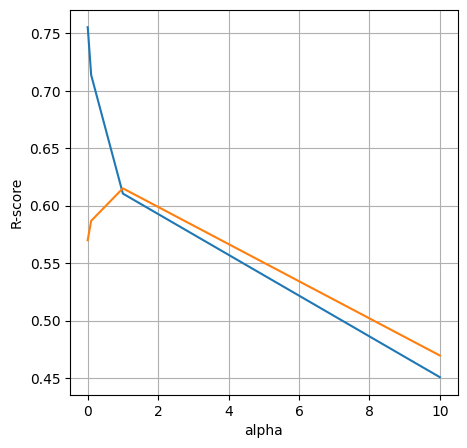

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(alpha_list, train_scores, label="train")
plt.plot(alpha_list, test_scores, label="test")
plt.xlabel("alpha")
plt.ylabel("R-score")
plt.grid()
plt.show()

```
1) to find the best value of alpha we are using train and test scores
2) the value alpha will change/impact the model
-> Hence test scores are used to tune the model hence "DATA LEAKAGE"
```

### Cross Validation and Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

```
Train: 80%
test: 20%
```

In [ ]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

```
Train: 0.60
Val: 0.20
Test: 0.20
```

In [129]:
print(X_train.shape, X_val.shape,X_test.shape, y_train.shape, y_val.shape,y_test.shape)

(398, 10) (44, 10) (89, 10) (398,) (44,) (89,)


```
1) Train model on Train Set
2) Find value of Degree and alpha using Validation Set
3) Check Performance of Final Model on Unseen Data i.e Test Set
```

### k-fold cross Validation

In [131]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X): #iterating through the K-folds
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    print(X_train.shape,X_val.shape)
    ## to do: fit ML pipeline with different values of degree


(353, 10) (89, 10)
(353, 10) (89, 10)
(354, 10) (88, 10)
(354, 10) (88, 10)
(354, 10) (88, 10)


In [134]:
from sklearn.model_selection import KFold, cross_val_score

# Transform the features into polynomial features
degree = 3
lasso = Lasso(0.3)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_pipe = make_pipeline(PolynomialFeatures(degree), StandardScaler(), lasso)

# Evaluate the model using cross-validation
scores = cross_val_score(lasso_pipe, X, y, cv=kf, scoring='r2')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+03, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.917e+03, tolerance: 2.054e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.459e+02, tolerance: 2.136e

r2 score: 0.23 (+/- 0.08)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.840e+03, tolerance: 2.113e+02
  model = cd_fast.enet_coordinate_descent(


In [136]:
scores

array([0.34181768, 0.28748063, 0.17182171, 0.1230496 , 0.22102072])

In [137]:
# Print the mean and standard deviation of scores
print("r2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

r2 score: 0.23 (+/- 0.08)


In [146]:
import numpy as np

np.logspace(0, 0.5, 10)

array([1.        , 1.13646367, 1.29154967, 1.46779927, 1.66810054,
       1.89573565, 2.15443469, 2.44843675, 2.7825594 , 3.16227766])

In [147]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


# Define hyperparameter grid for Lasso regression
param_grid = {'alpha': np.logspace(0, 0.5, 10), # Explore alpha values in a logarithmic range
              'fit_intercept': [True, False]}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=KFold(n_splits=5), scoring='r2')

# Fit the model to the data
grid_search.fit(X, y)

# Print best hyperparameters and score
print("Best alpha:", grid_search.best_params_)
print("Best cross-validation r2_score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best alpha: {'alpha': 1.0, 'fit_intercept': True}
Best cross-validation r2_score: 0.3375593674654274


In [148]:
# Make predictions on new data
predictions = best_model.predict(X_test)


print("Unseen data r2_score:", r2_score(y_test,predictions))

Unseen data r2_score: 0.3610910144887254


TO EXPLORE:
- RandomSearchCV
- BayesianSearchCV

- Recursive Feature Elimination
    - forward Elimination
    - backward Elimination